## Agridata 품질 측정 테스트

In [2]:
import pandas as pd

# Load the data
file_path = 'data/paprika_F00012_part1.csv'
original_df = pd.read_csv(file_path)
original_df['time'] = pd.to_datetime(original_df['time'], errors='coerce')
original_df = original_df.set_index('time')

In [3]:
original_df.describe()

,EXT_TMP,EXT_WIND_DIRECT,EXT_WIND_SPEED,INT_CO2,INT_REL_HD,INT_TMP,MAX_EXT_TMP,MIN_EXT_TMP
count,49497.000000,48787.000000,49497.000000,49497.000000,49497.000000,49497.000000,48787.000000,48787.000000
mean,15.913576,168.737779,0.876557,433.766666,67.037292,16.490740,16.359426,15.649700
std,10.451686,89.293481,0.893750,120.301534,17.322537,6.194294,10.505354,10.521975
min,-20.820000,90.000000,0.000000,-300.000000,18.230000,-2.480000,-20.000000,-21.400000
25%,9.790000,90.000000,0.160000,340.500000,57.250000,12.900000,10.200000,9.500000
50%,18.450000,90.000000,0.590000,398.590000,64.960000,16.210000,18.900000,18.300000
75%,23.530000,270.000000,1.360000,514.800000,79.560000,19.910000,24.100000,23.300000
max,37.760000,270.000000,6.330000,1148.830000,100.000000,37.000000,38.100000,37.700000


In [4]:
# 측정 기준 정하기
range_limits = {
    'max_num': {
        'EXT_TMP': 37.76, 'EXT_WIND_DIRECT': 270, 'EXT_WIND_SPEED': 6.33, 
        'INT_CO2': 1148.83, 'INT_REL_HD': 100, 'INT_TMP': 37.00, 
        'MAX_EXT_TMP': 38.10, 'MIN_EXT_TMP': 37.70
    },
    'min_num': {
        'EXT_TMP': -20.82, 'EXT_WIND_DIRECT': 90, 'EXT_WIND_SPEED': 0.00, 
        'INT_CO2': -300.00, 'INT_REL_HD': 18.23, 'INT_TMP': -2.48, 
        'MAX_EXT_TMP': -20.00, 'MIN_EXT_TMP': -21.40
    }
}

expected_types = {'EXT_TMP': float, 'EXT_WIND_DIRECT': float, 'EXT_WIND_SPEED': float, 'INT_CO2' : float, 
                  'INT_REL_HD': float, 'INT_TMP':float, 'MAX_EXT_TMP': float, 'MIN_EXT_TMP':float}

error_values = {
    "INT_CO2": [9999, -9999],  
    "INT_TMP": [9999, -9999],  
}

In [5]:
# measure data quality
from quality.measurement.data_quality_metrices import DataQualityMetrics
import pprint

print("original_data_quality")
metrics = DataQualityMetrics(original_df, range_limits=range_limits, expected_types=expected_types, error_values = error_values, 
                                z_threshold = 2.5, percentile_range = (0.1, 0.9))
original_result= metrics.get_metrics()
pprint.pprint(original_result, sort_dicts=False, width=80)

original_data_quality
{'syntactic_accuracy_A': 1.0,
 'semantic_accuracy_B': 1.0,
 'risk_of_inaccuracy_C': 0.02,
 'main_duration(s)': 600.0,
 'range_accuracy_D': 0.62,
 'overall_data_quality': 90.0}


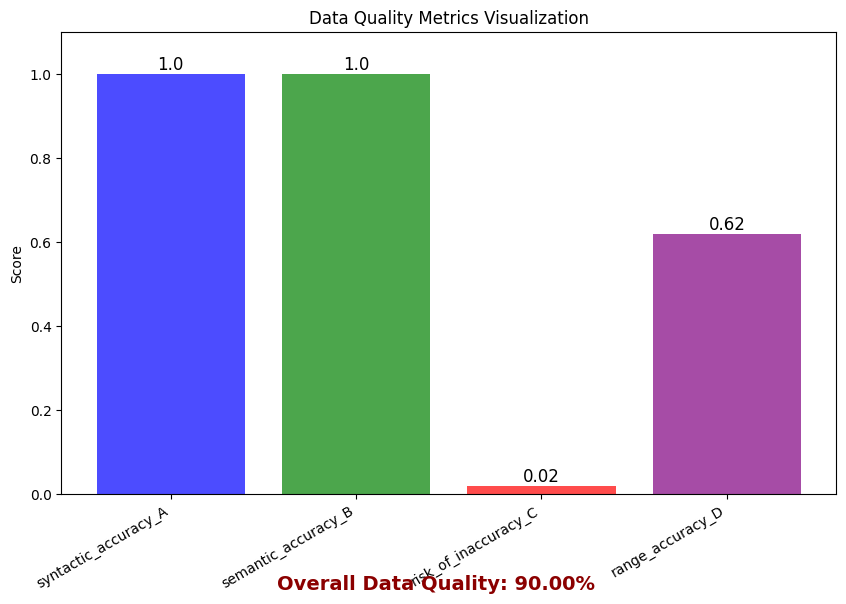

In [6]:
from quality.measurement.visualisation_data_quality import visualize_metrics

visualize_metrics(original_result)